### Gravitational wave visualizer



##### Objective: This code helps to visualize gravitational waves (GWs) with the help of LIGO Algorithm Library (LAL) Simulations through PYCBC. PYCBC is the search pipeline used in the first detection of binary black hole merger on 14th September, 2015.



Here you can tweak the parameters of the binary black hole mergers producing GWs. The default parameters are that of the very first event called GW150914. You can tweak with the binary masses, binary orbital phase, their different spin components, the distance from us and its inclination angle. For more details on the event, you can read: https://arxiv.org/abs/1602.03837  

Please note, this is NOT the wave that the LIGO detectors at Hanford and Livingston measured that day. The measured wave is obtained when we account for the response function of each detectors, the scope of which lies beyond this tool.

In [6]:
import numpy as np
from pycbc.waveform import get_td_waveform
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display
import threading

# Optimized default parameters for speed
default_params = {
    'mass1': 30,
    'mass2': 30,
    'spin1z': 0,
    'spin2z': 0,
    'distance': 1000,
    'inclination': 0,
    'delta_t': 1.0 / 1024,
    'f_lower': 30,
    'approximant': 'IMRPhenomXPHM'
}

_waveform_cache = {}
_update_timer = None

# Initialize figure with two traces: hp and hc
fig = go.FigureWidget()
fig.add_scatter(name=r'hp', line=dict(color='#39FF14'))  # neon green
fig.add_scatter(name=r'hc', line=dict(color='#FF6700'))  # neon orange

fig.update_layout(
    title='Gravitational Waveform',
    xaxis_title='Time from merger (s)',
    yaxis_title='Strain',
    showlegend=True,
    xaxis=dict(range=[-1, 0.25]),
    yaxis=dict(range=[-2e-21, 2e-21]),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Sliders
slider_layout = widgets.Layout(width='250px', height='30px')

mass1_slider = widgets.FloatSlider(value=36, min=5, max=100, step=1, description='Mass 1')
mass2_slider = widgets.FloatSlider(value=29, min=5, max=100, step=1, description='Mass 2')
spin1x_slider = widgets.FloatSlider(value=0, min=-1, max=1, step=0.1, description='Spin 1x')
spin1y_slider = widgets.FloatSlider(value=0, min=-1, max=1, step=0.1, description='Spin 1y')
spin1z_slider = widgets.FloatSlider(value=0, min=-1, max=1, step=0.1, description='Spin 1z')
spin2x_slider = widgets.FloatSlider(value=0, min=-1, max=1, step=0.1, description='Spin 2x')
spin2y_slider = widgets.FloatSlider(value=0, min=-1, max=1, step=0.1, description='Spin 2y')
spin2z_slider = widgets.FloatSlider(value=0, min=-1, max=1, step=0.1, description='Spin 2z')
distance_slider = widgets.FloatSlider(value=410, min=100, max=10000, step=100, description='Distance')
inclination_slider = widgets.FloatSlider(value=0, min=0, max=np.pi, step=0.1, description='Inclination')
coa_phase_slider = widgets.FloatSlider(value=0, min=0, max=2 * np.pi, step=0.1, description='Coa Phase')

def generate_waveform(m1, m2, s1x, s1y, s1z, s2x, s2y, s2z, dist, inc, coa_phase):
    key = (m1, m2, s1x, s1y, s1z, s2x, s2y, s2z, dist, inc, coa_phase)
    if key in _waveform_cache:
        return _waveform_cache[key]
    hp, hc = get_td_waveform(
        mass1=m1,
        mass2=m2,
        spin1x=s1x,
        spin1y=s1y,
        spin1z=s1z,
        spin2x=s2x,
        spin2y=s2y,
        spin2z=s2z,
        distance=dist,
        inclination=inc,
        coa_phase=coa_phase,
        delta_t=default_params['delta_t'],
        f_lower=default_params['f_lower'],
        approximant=default_params['approximant']
    )
    result = (hp.sample_times.numpy(), hp.numpy(), hc.numpy())
    _waveform_cache[key] = result
    return result

def update_waveform():
    t, hp_wave, hc_wave = generate_waveform(
        mass1_slider.value,
        mass2_slider.value,
        spin1x_slider.value,
        spin1y_slider.value,
        spin1z_slider.value,
        spin2x_slider.value,
        spin2y_slider.value,
        spin2z_slider.value,
        distance_slider.value,
        inclination_slider.value,
        coa_phase_slider.value
    )
    with fig.batch_update():
        fig.data[0].x = t
        fig.data[0].y = hp_wave
        fig.data[1].x = t
        fig.data[1].y = hc_wave

def debounce_update(change=None):
    global _update_timer
    if _update_timer:
        _update_timer.cancel()
    _update_timer = threading.Timer(0.3, update_waveform)
    _update_timer.start()

# Link sliders with debounced update
sliders = [
    mass1_slider, mass2_slider,
    spin1x_slider, spin1y_slider, spin1z_slider,
    spin2x_slider, spin2y_slider, spin2z_slider,
    distance_slider, inclination_slider,
    coa_phase_slider
]
for slider in sliders:
    slider.observe(debounce_update, names='value')

# Initial plot
update_waveform()

# Organize sliders into rows
sliders_box = widgets.VBox([
    widgets.HBox([mass1_slider, mass2_slider], layout=widgets.Layout(justify_content='center')),
    widgets.HBox([spin1x_slider, spin1y_slider, spin1z_slider], layout=widgets.Layout(justify_content='center')),
    widgets.HBox([spin2x_slider, spin2y_slider, spin2z_slider], layout=widgets.Layout(justify_content='center')),
    widgets.HBox([distance_slider, inclination_slider, coa_phase_slider], layout=widgets.Layout(justify_content='center'))
], layout=widgets.Layout(align_items='center'))

final_layout = widgets.VBox([fig, sliders_box])
display(final_layout)


    'data': [{'line': {'color': '#39FF14'},
              'name': 'hp',
        …

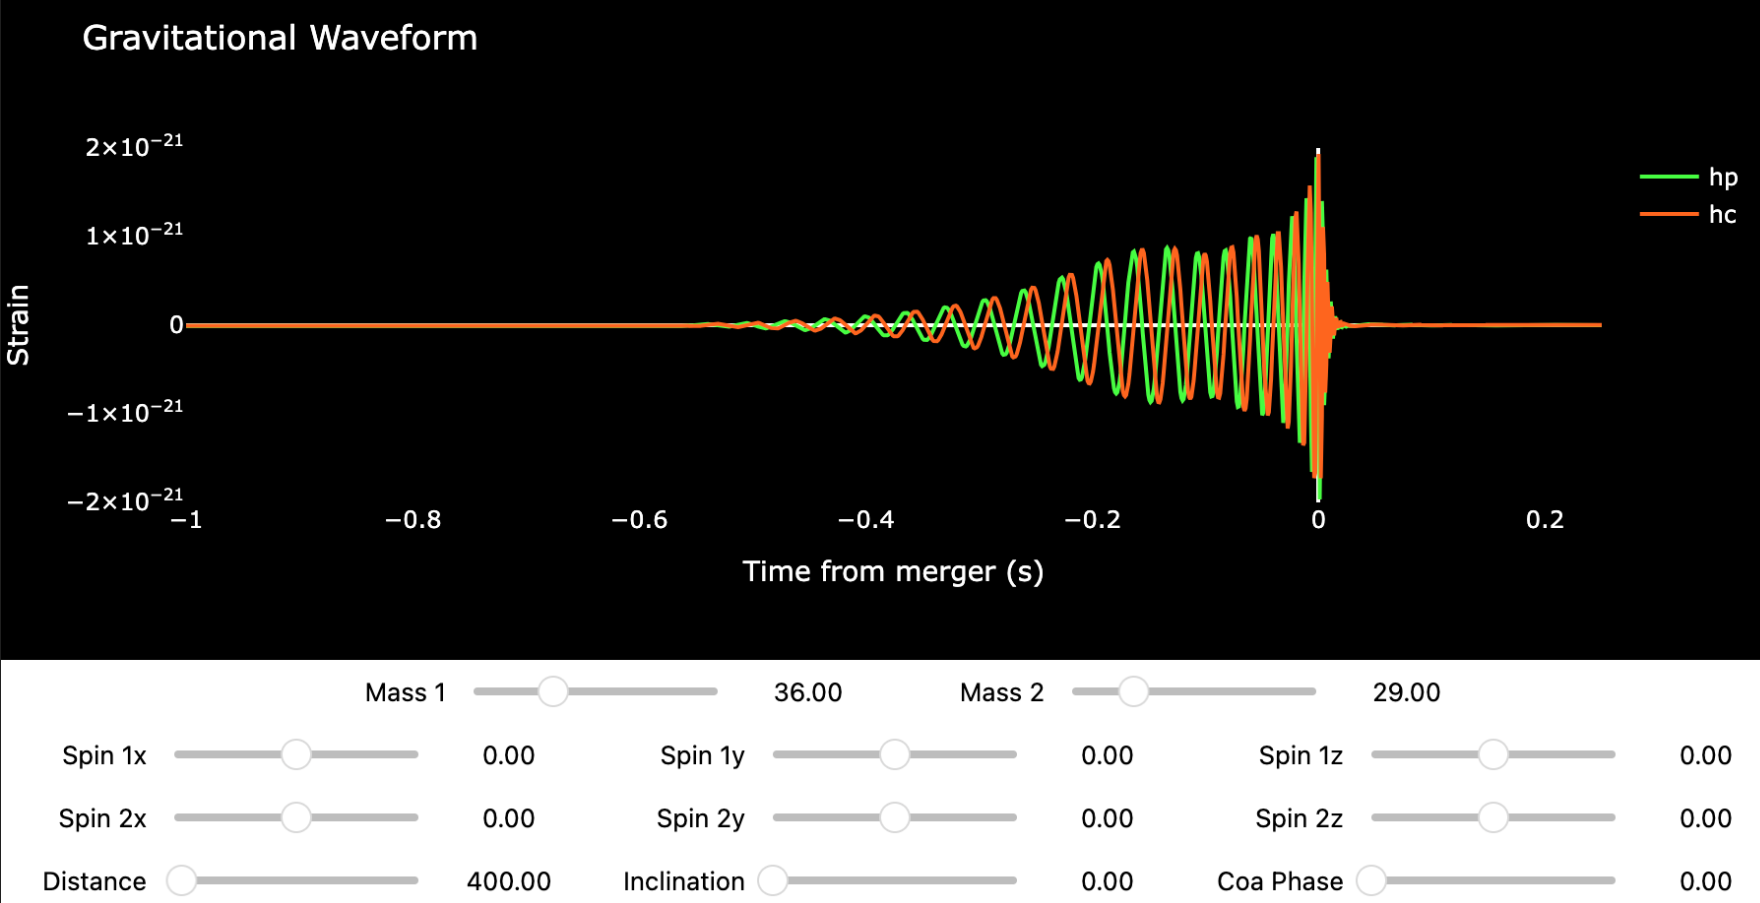

In [8]:
from IPython.display import Image, display
display(Image(filename='toolkit.png'))